In [79]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [80]:
from scipy.io import loadmat

In [126]:
data = loadmat('data-in/ex3data1.mat')
print(type(data))

<class 'dict'>


In [127]:
def load_data(data, transpose=True):
    y = data.get('y')
    X = data.get('X')
    
    if transpose:
        X = np.array([im.reshape(20,20).T for im in X])
        
        X = np.array([im.reshape(400) for  im in X])
        
    return X, y

In [128]:
X, y = load_data(data)

In [131]:
print(X.shape, y.shape)
row_y = y.copy()

(5000, 400) (5000, 1)


In [85]:
import matplotlib
def plot_an_image(image):
    """
    image:(400)
    """
    fig, ax = plt.subplots(figsize=(1,1))
    ax.matshow(image.reshape(20,20), cmap=matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))

In [86]:
pick_one = np.random.randint(0,5000)

this image should be 437


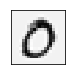

In [87]:
plot_an_image(X[pick_one, :])
print('this image should be %s' % pick_one)

In [88]:
def plot_100_image(X):
    size = int(np.sqrt(X.shape[1]))
    print(size)
    
    sample_idx = np.random.choice(np.arange(X.shape[0]), 100)
    sample_images = X[sample_idx, :]
    
    fig, ax_array = plt.subplots(nrows=10, ncols=10, sharex=True, sharey=True, figsize=(8,8))
    
    for r in range(10):
        for c in range(10):
            ax_array[r,c].matshow(sample_images[10 * r + c].reshape(size,size), \
                                 cmap=matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

20


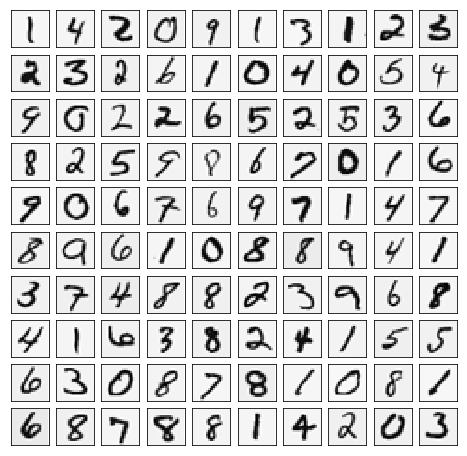

In [89]:
plot_100_image(X)

## prepare data

In [90]:
X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)
X.shape

(5000, 401)

In [91]:
print(y.shape)

(5000, 1)


In [92]:
y = y.reshape(y.shape[0])
y_matrix = []

for k in range(1,11):
    y_matrix.append((y == k).astype(int))

y_matrix = [y_matrix[-1]] + y_matrix[:-1]
y = np.array(y_matrix)
y.shape

(10, 5000)

## logistic regression

In [94]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [95]:
def cost(theta, X, y):
    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)))

In [96]:
def gradient(theta, X, y):
    '''batch gradient'''
    return (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)

In [97]:
def predict(X, theta):
    prob = sigmoid(X @ theta)
    return (prob >= 0.5).astype(int)

In [99]:
def regularized_cost(theta, X, y, rate=1):
    regularized_term = (1 / (2 * len(X))) * np.power(theta, 2).sum()
    
    return cost(theta, X, y) + regularized_term

In [106]:
def regularized_gradient(theta, X, y, rate=1):
    regularized_theta = (1 / len(X)) * theta
#     print(regularized_theta.shape)
#     regularized_therm = np.concatenate([np.array([0]), regularized_theta])
    
    return gradient(theta, X, y) + regularized_theta

In [98]:
import scipy.optimize as opt

In [102]:
def logistic_regression(X, y, rate=1):
    theta = np.zeros(X.shape[1])
    
    res = opt.minimize(fun=regularized_cost, \
                      x0=theta, \
                      args=(X, y, rate), \
                      method='TNC', \
                      jac=regularized_gradient, \
                      options={'disp': True})
    
    final_theta = res.x
    
    return final_theta

## train 1 model

In [107]:
t0 = logistic_regression(X, y[0])

In [111]:
print(t0.shape)
y_pred = predict(X, t0)
print('accuracy=%.4f' % np.mean(y[0] == y_pred))

(401,)
accuracy=0.9972


## train k model

In [112]:
k_theta = np.array([logistic_regression(X, y[k]) for k in range(10)])
print(k_theta.shape)

(10, 401)


In [113]:
prob_matrix = sigmoid(X @ k_theta.T)

In [115]:
prob_matrix

array([[  9.96658793e-01,   2.63690053e-09,   6.10280780e-04, ...,
          6.48282817e-05,   8.51038543e-05,   2.00168209e-03],
       [  9.98061644e-01,   9.25222822e-08,   6.08652848e-05, ...,
          8.02962184e-05,   4.93252217e-06,   8.97368992e-05],
       [  9.83804336e-01,   3.00845270e-10,   5.05277340e-04, ...,
          7.00541218e-06,   3.04376214e-02,   2.22319734e-03],
       ..., 
       [  2.54618900e-06,   4.38649099e-02,   3.59382385e-03, ...,
          1.46255046e-04,   4.77895739e-03,   7.17102040e-01],
       [  1.72555315e-05,   8.48577611e-08,   7.05977603e-08, ...,
          1.59819087e-03,   5.48805353e-02,   8.44160195e-01],
       [  2.96172234e-02,   1.68562936e-10,   1.33687425e-04, ...,
          3.63517081e-01,   9.44525686e-03,   1.59155079e-01]])

In [116]:
y_pred = np.argmax(prob_matrix, axis=1)

In [132]:
y_answer = row_y
y_answer[y_answer == 10] = 0

In [120]:
from sklearn.metrics import classification_report

In [133]:
print(y_answer.shape,y_pred.shape)
print(type(y_answer), type(y_pred))
print(classification_report(y_answer, y_pred))

(5000, 1) (5000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       500
          1       0.96      0.98      0.97       500
          2       0.94      0.92      0.93       500
          3       0.94      0.91      0.92       500
          4       0.95      0.96      0.95       500
          5       0.92      0.91      0.92       500
          6       0.97      0.98      0.97       500
          7       0.95      0.95      0.95       500
          8       0.92      0.93      0.92       500
          9       0.92      0.92      0.92       500

avg / total       0.94      0.94      0.94      5000

